In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████████████| 1.55k/1.55k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\adnan\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the downloaded Kaggle path
csv_path = r"C:\Users\adnan\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1\Mall_Customers.csv"
df = pd.read_csv(csv_path)

# Show first 5 rows
print(df.head())

# Basic info
print(df.info())

# Optional: Pairplot to


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


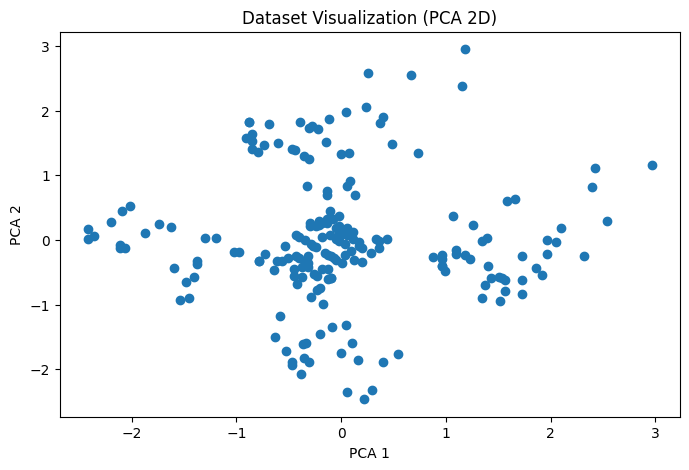

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Visualize using PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Dataset Visualization (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


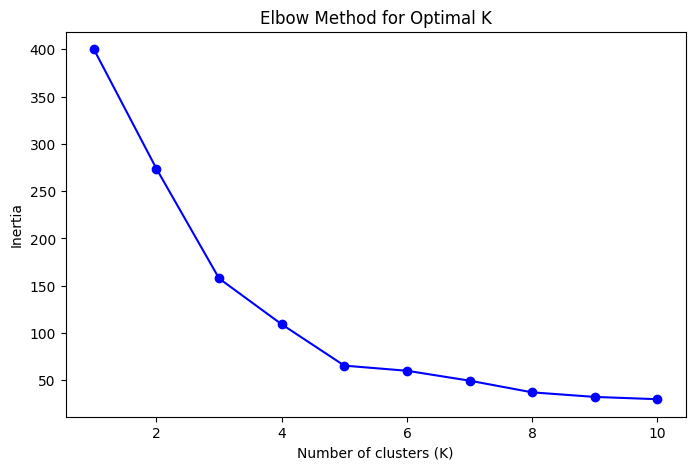

In [6]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
# Let's assume from Elbow curve K=5 is optimal
optimal_k = 5

# Fit KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

# Show first 5 rows with clusters
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


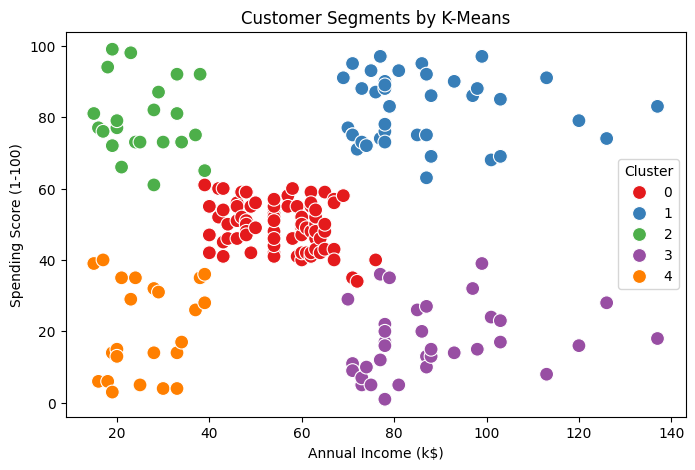

In [8]:
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set1', data=df, s=100)
plt.title('Customer Segments by K-Means')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for K={optimal_k}: {score:.2f}')


Silhouette Score for K=5: 0.55
